In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import econtools as econ
import econtools.metrics as mt
import math

In [2]:
df, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/df.sav")

In [3]:
##### linear combination ###### - works well
var_neg = np.var(df['negativejudg'])
var_comp = np.var(df['competition'])
var_learn = np.var(df['learning'])
var_bp = np.var(df['betterperson'])

df['comb_perf'] = (var_neg*df['negativejudg'] + var_comp*df['competition']) / (var_neg + var_comp)
df['comb_mastery'] =(var_learn*df['learning'] + var_bp*df['betterperson']) / (var_learn + var_bp)
df['comb_perfshare']= df['comb_perf']/ (df['comb_mastery']+df['comb_perf'])
df['comb_masteryshare'] = 1-df['comb_perfshare']

In [69]:

df_youth, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/12차년도(2015) DATA/중학교 3학년 코호트/f11_m_youth.sav")

In [70]:
# employed and earning values
df_youth = df_youth[(df_youth["F11Y05034"]>0) & (df_youth["F11Y05002"] == 1)]
df_youth = df_youth.rename(columns = {"F11Y05034": "income_st"})
df_youth = df_youth[["BYSID", "income_st"]]

In [71]:
income_list = df_youth["BYSID"].to_list()
df3 = df[df["year"]==2003]
df4 = df[df["year"]==2004]

In [72]:
df3 = pd.merge(df3,df_youth)
df4 = pd.merge(df4,df_youth)

In [73]:
df.loc[df['BYSID'].isin(income_list) == True, 'comb_perfshare']

4       0.503149
7       0.405132
8       0.365742
10      0.447594
12      0.535595
          ...   
3837    0.447594
3838    0.365742
3839    0.503149
3841    0.365742
3842    0.334130
Name: comb_perfshare, Length: 1650, dtype: float64

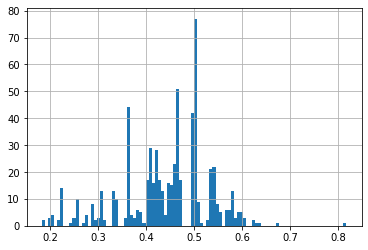

In [74]:
df3['comb_perfshare'].hist(bins = 100)

In [75]:
#############################################
#완전 박제: 음수가 나왔어ㅠㅠㅠcomb_perfshare
############################################
y = df3['income_st']
x = df3['comb_perfshare']

exog = ['comb_perfshare', 'comb_masteryshare','income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df3, 'comb_perf', exog))
print(np.corrcoef(x,y))

y = df3['income_st']
x = df3['comb_perf']

exog = ['comb_perf','income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df3, 'comb_perf', exog))
print(np.corrcoef(x,y))

Dependent variable:	comb_perf
N:			641
R-squared:		-2.6726
Estimation method:	OLS
VCE method:		Standard (Homosk.)
                    coeff    se      t   p>t CI_low CI_high
comb_perfshare     -2.000   nan    nan   nan    nan     nan
comb_masteryshare -14.000   nan    nan   nan    nan     nan
income_rank_p       0.189 0.353  0.537 0.592 -0.503   0.882
region              0.003 0.015  0.233 0.816 -0.026   0.032
typeofschool       -0.002 0.080 -0.022 0.982 -0.160   0.156
GENDER             -0.168 0.137 -1.221 0.222 -0.437   0.102
year                0.005   nan    nan   nan    nan     nan

[[ 1.         -0.05740888]
 [-0.05740888  1.        ]]
Dependent variable:	comb_perf
N:			641
R-squared:		1.0000
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se                    t   p>t CI_low CI_high
comb_perf      1.000 0.000 1349878017759207.250 0.000  1.000   1.000
income_rank_p  0.000 0.000                0.391 0.696 -0.000   0.000
region        -0.000 0.000    

C:\Users\thxkn\anaconda3\lib\site-packages\econtools\metrics\core.py:203: RuntimeWarning: invalid value encountered in sqrt
  se = pd.Series(np.sqrt(np.diagonal(vce)), index=vce.columns)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


In [ ]:
# 자기 대학에 만족? F5Y01048
# 대학 선택 가장 크게 영향 준 사람: F5Y01050, F5Y01051
# 학교성적 우수학생이 경제적으로 성공?F5Y12009
# 우리사회에서 경제적으로 성공하는데 가장 중요한 것F5Y12010
# 직장생활 성공에서 가장 중요한 것 F5Y12028 
# 우리 사회에서 누구나 성공? F5Y12022

In [77]:

df_help, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/6차년도(2009) DATA/중학교 3학년생 코호트/f5_m_youth.sav")

In [80]:
df_help['F5Y12022'].value_counts()

 2.0    618
 4.0    597
 3.0    544
 1.0    103
 5.0     95
-3.0      2
-2.0      1
Name: F5Y12022, dtype: int64

In [103]:
df_help = df_help[['BYSID','F5Y12022']]

In [104]:
df3 = pd.merge(df3, df_help)

In [92]:
just_list = df_help.loc[df_help['F5Y12022'] == 2.0, "BYSID"]
just_list_po = df_help.loc[df_help['F5Y12022'] == 4.0, "BYSID"]

In [90]:
df3.loc[ df3["BYSID"].isin(just_list) == True, 'income_st' ].mean()

171.86861313868613

In [91]:
df3['income_st'].mean()

178.4383775351014

In [93]:
df3.loc[ df3["BYSID"].isin(just_list_po) == True, 'income_st' ].mean()

182.4033613445378

In [96]:
#SAT

df_sat = pd.read_excel("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/수능(2005-2009학년도) DATA(Layout 포함)/수능 DATA(2008-2009학년도)_중학교 3학년생 코호트.xlsx")

df_sat = df_sat[["AT08_32","AT08_33","AT08_34","AT09_32","AT09_33","AT09_34","BYSID"]]
df_sat["total_score_1"] = df_sat["AT08_32"] + df_sat["AT08_33"] + df_sat["AT08_34"]
df_sat["total_score_2"] = df_sat["AT09_32"] + df_sat["AT09_33"] + df_sat["AT09_34"]

In [97]:
df_sat.loc[df_sat["BYSID"].isin(just_list_po) == True, 'total_score_1'].mean()

14.436666666666667

In [98]:
df_sat.loc[df_sat["BYSID"].isin(just_list) == True, 'total_score_1'].mean()

13.85919540229885

In [99]:
df_sat["total_score_1"].mean()

15.020515826494725

In [100]:
df3.loc[df3["BYSID"].isin(just_list_po) == True, 'comb_perfshare'].mean()

0.4527201213038497

In [101]:
df3.loc[df3["BYSID"].isin(just_list) == True, 'comb_perfshare'].mean()

0.4315825674873673

In [107]:
np.corrcoef(df3['comb_masteryshare'], df3['F5Y12022']) #mastery 일 수록 사회에 대한 belief 적어졌다

array([[ 1.        , -0.05701253],
       [-0.05701253,  1.        ]])

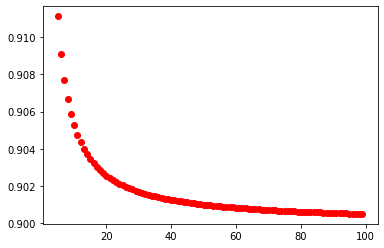

In [119]:
p = 1
m = 5
x0 = 1
v = range(5,100)
y = [ 1 - ((p/m) * (x- x0)/(2*x - x0)) for x in v]
plt.plot(v,y, 'ro')

<h2> Bootstrap </h2>

The bootstrap is a widely applicable and extremely powerful statistical tool
bootstrap
that can be used to quantify the uncertainty associated with a given estimator
or statistical learning method. As a simple example, the bootstrap
can be used to estimate the standard errors of the coefficients from a linear
regression fit.

In [ ]:
#F3S01129 등급
#F2S01109

<h2>Proxy</h2>

In [11]:
goals = ['negativejudg', 'competition','learning','betterperson']

df['negativejudg'].value_counts()
df['competition'].value_counts()
df['learning'].value_counts()
df['betterperson'].value_counts()

4.0    2200
3.0     795
5.0     607
2.0     196
1.0      46
Name: betterperson, dtype: int64

In [56]:
goal_mean = []
goal_var = []
for i in goals:
    goal_mean.append(df[i].mean())
    goal_var.append(np.var(df[i]))

In [57]:
j = 0
for i in goals:
    df[i+'_std'] = (df[i]-goal_mean[j])/ goal_var[j]
    j = j+1

In [58]:
df['perf_std'] = (df['competition_std']+df['negativejudg_std'])/2
df['mastery_std'] = (df['learning_std']+df['betterperson_std'])/2
df['perfshare_std'] = df['perf_std'] / df['perf_std'] + df['mastery_std']
df['masteryshare_std'] = df['mastery_std'] / df['mastery_std'] + df['perf_std'] 

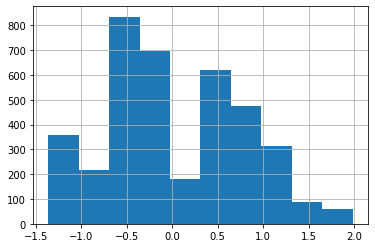

In [22]:
df['perf_std'].hist()

In [23]:
std_goal = ['perf_std', 'perfshare_std', 'mastery_std', 'masteryshare_std']

y = df['perf_std']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'perf_std', exog))
print(np.corrcoef(x,y))

y = df['perfshare_std']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'perfshare_std', exog))
print(np.corrcoef(x,y))

Dependent variable:	perf_std
N:			3844
R-squared:		0.0098
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.087 0.063  1.394 0.163 -0.035   0.210
region         0.002 0.003  0.723 0.470 -0.003   0.007
typeofschool   0.010 0.005  2.095 0.036  0.001   0.019
GENDER        -0.133 0.025 -5.355 0.000 -0.182  -0.085
year          -0.000 0.000 -0.190 0.850 -0.000   0.000

[[1.         0.02697525]
 [0.02697525 1.        ]]
Dependent variable:	perfshare_std
N:			3844
R-squared:		0.0370
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.551 0.079  7.014 0.000  0.397   0.705
region         0.000 0.003  0.108 0.914 -0.006   0.007
typeofschool   0.015 0.006  2.583 0.010  0.004   0.026
GENDER        -0.279 0.031 -8.938 0.000 -0.340  -0.218
year           0.000 0.000 17.503 0.000  0.000   0.000

[[1.         0.12105894]
 [0.12105894 1.        ]]


In [24]:
y = df['mastery_std']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'mastery_std', exog))
print(np.corrcoef(x,y))

y = df['masteryshare_std']
x = df['income_rank_p']

exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year']
print(mt.reg(df, 'masteryshare_std', exog))
print(np.corrcoef(x,y))

Dependent variable:	mastery_std
N:			3844
R-squared:		0.0370
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.551 0.079  7.013 0.000  0.397   0.705
region         0.000 0.003  0.109 0.914 -0.006   0.007
typeofschool   0.015 0.006  2.587 0.010  0.004   0.026
GENDER        -0.279 0.031 -8.938 0.000 -0.340  -0.218
year          -0.000 0.000 -2.576 0.010 -0.000  -0.000

[[1.         0.12105894]
 [0.12105894 1.        ]]
Dependent variable:	masteryshare_std
N:			3844
R-squared:		0.0098
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.087 0.063  1.395 0.163 -0.035   0.210
region         0.002 0.003  0.722 0.470 -0.003   0.007
typeofschool   0.010 0.005  2.090 0.037  0.001   0.019
GENDER        -0.133 0.025 -5.355 0.000 -0.182  -0.085
year           0.000 0.000 24.984 0.000  0.000   0.001

[[1.         0.02697525]
 [0.02697525 1.        ]]

In [25]:
x = df['income_rank_p']
exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year', ]

for i in goals:
    print(mt.reg(df, i, exog))

Dependent variable:	negativejudg
N:			3844
R-squared:		0.0101
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.163 0.088  1.864 0.062 -0.008   0.335
region         0.005 0.004  1.337 0.181 -0.002   0.012
typeofschool   0.020 0.006  3.100 0.002  0.007   0.033
GENDER        -0.158 0.035 -4.527 0.000 -0.226  -0.089
year           0.001 0.000 45.391 0.000  0.001   0.001

Dependent variable:	competition
N:			3844
R-squared:		0.0054
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.043 0.090  0.477 0.634 -0.134   0.219
region        -0.001 0.004 -0.138 0.890 -0.008   0.007
typeofschool   0.003 0.007  0.384 0.701 -0.010   0.016
GENDER        -0.161 0.036 -4.508 0.000 -0.231  -0.091
year           0.001 0.000 47.647 0.000  0.001   0.001

Dependent variable:	learning
N:			3844
R-squared:		0.0354
Estimation method:	OLS
VCE method:		Standard (H

In [38]:
#F3S01129 등급
#F2S01109

df['attainment'] = df['F3S01129']
df.loc[df['year'] == 2003, 'attainment' ] = df['F2S01109']
df = df[df['attainment']>0]

In [39]:
x = df['income_rank_p']
exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year', 'attainment', ]

for i in goals:
    print(mt.reg(df, i, exog))

Dependent variable:	negativejudg
N:			3824
R-squared:		0.0104
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.145 0.088  1.639 0.101 -0.028   0.318
region         0.005 0.004  1.239 0.216 -0.003   0.012
typeofschool   0.019 0.007  2.906 0.004  0.006   0.032
GENDER        -0.149 0.035 -4.276 0.000 -0.218  -0.081
year           0.001 0.000 35.440 0.000  0.001   0.001
attainment    -0.019 0.011 -1.826 0.068 -0.040   0.001

Dependent variable:	competition
N:			3824
R-squared:		0.0231
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -0.033 0.090 -0.368 0.713 -0.210   0.143
region         0.000 0.004  0.069 0.945 -0.007   0.008
typeofschool  -0.002 0.007 -0.342 0.732 -0.015   0.011
GENDER        -0.145 0.036 -4.063 0.000 -0.215  -0.075
year           0.002 0.000 41.643 0.000  0.001   0.002
attainment    -0.091 0.011 -8.346 0.000 -0.112  -0.

In [40]:
df.loc[df['year'] == 2003, 'F3TID']= 0

In [44]:
df.loc[df['year'] == 2004, 'F3TID'].isna().value_counts()

False    1487
True      834
Name: F3TID, dtype: int64

In [59]:
df_temp = df[df['year']==2004]

In [49]:
x = df_temp['income_rank_p']
exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year', 'attainment', 'F3TID' ]

for i in goals:
    print(mt.reg(df_temp, i, exog))

Dependent variable:	negativejudg
N:			1487
R-squared:		0.0156
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p  0.065 0.153  0.425 0.671 -0.234   0.364
region        -0.002 0.006 -0.330 0.741 -0.014   0.010
typeofschool   0.022 0.011  2.083 0.037  0.001   0.043
GENDER        -0.147 0.058 -2.534 0.011 -0.261  -0.033
year           0.001 0.000 10.541 0.000  0.001   0.002
attainment    -0.027 0.018 -1.505 0.133 -0.061   0.008
F3TID         -0.000 0.000 -1.003 0.316 -0.000   0.000

Dependent variable:	competition
N:			1487
R-squared:		0.0274
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -0.162 0.153 -1.062 0.289 -0.461   0.137
region        -0.003 0.006 -0.453 0.650 -0.015   0.009
typeofschool   0.007 0.011  0.648 0.517 -0.014   0.028
GENDER        -0.151 0.058 -2.597 0.010 -0.264  -0.037
year           0.002 0.000 12.015 0.000  0.001   0.

In [52]:
comb_goal = ['comb_perf', 'comb_perfshare', 'comb_mastery', 'comb_masteryshare']

In [54]:
x = df_temp['income_rank_p']
exog = ['income_rank_p', 'region', 'typeofschool', 'GENDER', 'year', 'attainment', 'F3TID' ]

for i in comb_goal:
    print(mt.reg(df_temp, i, exog))

Dependent variable:	comb_perf
N:			1487
R-squared:		0.0254
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -0.051 0.130 -0.395 0.693 -0.307   0.204
region        -0.002 0.005 -0.461 0.645 -0.013   0.008
typeofschool   0.014 0.009  1.579 0.115 -0.003   0.032
GENDER        -0.149 0.049 -3.009 0.003 -0.246  -0.052
year           0.002 0.000 13.245 0.000  0.001   0.002
attainment    -0.061 0.015 -4.044 0.000 -0.090  -0.031
F3TID         -0.000 0.000 -1.029 0.304 -0.000   0.000

Dependent variable:	comb_perfshare
N:			1487
R-squared:		0.0094
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -0.029 0.014 -2.173 0.030 -0.056  -0.003
region         0.000 0.001  0.658 0.511 -0.001   0.001
typeofschool   0.001 0.001  1.001 0.317 -0.001   0.003
GENDER        -0.002 0.005 -0.322 0.747 -0.012   0.008
year           0.000 0.000 18.856 0.000  0.000   0.

In [62]:
(df['negativejudg']+df['competition']).mean()

5.260460251046025

In [63]:
(df['learning']+df['betterperson']).mean()

6.650366108786611

In [65]:
(df['learning']+df['betterperson']).describe()

count    3824.000000
mean        6.650366
std         1.341264
min         2.000000
25%         6.000000
50%         7.000000
75%         7.000000
max        10.000000
dtype: float64

In [67]:
(df['negativejudg']+df['competition']).describe()

count    3824.000000
mean        5.260460
std         1.848045
min         2.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        10.000000
dtype: float64